In [1]:
import json
with open('v2_OpenEnded_mscoco_test2015_questions.json','r',encoding='utf8')as fp:
    json_data = json.load(fp)
    


In [2]:
sorted(json_data)

['data_subtype', 'data_type', 'info', 'license', 'questions', 'task_type']

In [3]:
json_data['questions'].__len__()

447793

In [4]:
sorted(json_data)

['data_subtype', 'data_type', 'info', 'license', 'questions', 'task_type']

In [6]:
json = json_data['task_type']
json

'Open-Ended'

In [9]:
json1 = json_data['license']
json1

{'url': 'http://creativecommons.org/licenses/by/4.0/',
 'name': 'Creative Commons Attribution 4.0 International License'}

In [21]:
json = json_data['questions']
json

[{'image_id': 262144,
  'question': 'Is the ball flying towards the batter?',
  'question_id': 262144000},
 {'image_id': 262144,
  'question': 'What sport is this?',
  'question_id': 262144001},
 {'image_id': 262144,
  'question': 'Can you see the ball?',
  'question_id': 262144002},
 {'image_id': 262144,
  'question': 'Is the pitcher wearing a hat?',
  'question_id': 262144003},
 {'image_id': 262144,
  'question': 'Will he catch the ball in time?',
  'question_id': 262144004},
 {'image_id': 262144,
  'question': 'What credit card company is on the banner in the background?',
  'question_id': 262144005},
 {'image_id': 1,
  'question': 'What is the fence made of?',
  'question_id': 1000},
 {'image_id': 1, 'question': 'What color is the truck?', 'question_id': 1001},
 {'image_id': 1,
  'question': 'What service does the car parked at the curb provide?',
  'question_id': 1002},
 {'image_id': 524292,
  'question': 'What function is served by the item the giraffe is peering into?',
  'quest

In [34]:
for index, item in enumerate(json):
    if item['question_id'] == 245004:
        print(index)

937


In [32]:
json[249]

{'image_id': 43703,
 'question': 'What kind of vehicle is in the water behind the bus?',
 'question_id': 43703004}

In [33]:
json[937]

{'image_id': 245,
 'question': "What is on the woman with the green shirt's head?",
 'question_id': 245004}

In [2]:
import numpy as np
path = 'MCCAV/COCO_test2015_000000000245.jpg.npz'

a=np.load(path)

print(a['bbox'])


[[9.0691330e+01 3.3556835e+01 6.3920001e+02 4.1114923e+02]
 [6.9023924e+00 2.0127641e+02 6.1664612e+02 4.7920001e+02]
 [0.0000000e+00 4.0226784e+01 1.6893437e+02 2.6840820e+02]
 [2.8087296e+02 3.1435853e-01 3.8299454e+02 9.5141563e+01]
 [2.0572327e+02 5.7446156e+01 3.0553656e+02 1.7300897e+02]
 [3.6967447e+02 5.2490936e+01 4.7929916e+02 1.7340862e+02]
 [2.9038766e+02 1.0793845e+02 3.9767795e+02 2.2099809e+02]
 [0.0000000e+00 0.0000000e+00 4.7155859e+02 2.4860628e+02]
 [0.0000000e+00 9.8776855e+00 1.2202152e+02 2.9729694e+02]
 [5.7198212e+01 9.9537186e+01 1.4661121e+02 2.1339848e+02]
 [3.3892258e+02 1.4311360e+02 3.7016608e+02 1.8397794e+02]
 [1.0889093e+01 3.3536716e+02 1.9873650e+02 4.1662344e+02]
 [0.0000000e+00 3.2597492e+01 9.5414993e+01 1.4008244e+02]
 [1.9324460e+02 7.8879379e+01 4.9757941e+02 2.4684448e+02]
 [0.0000000e+00 1.7294495e+02 9.7305992e+01 2.8549353e+02]
 [4.7067993e+02 0.0000000e+00 6.3920001e+02 2.0063385e+02]
 [0.0000000e+00 8.5255861e+00 1.5854402e+02 2.3234302e+0

In [3]:
sorted(a)

['bbox', 'image_h', 'image_w', 'num_bbox', 'x']

In [33]:
bbox = a['bbox']
bbox1 =np.vstack((bbox[11:12], bbox[19:20]))
bbox2 =np.vstack((bbox1, bbox[33:34]))
bbox3 =np.vstack((bbox2, bbox[34:35]))
#bbox0 = np.vstack((bbox3, bbox[41:42]))
#bbox3 = np.vstack((bbox0, bbox[22:23]))
bbox3 = np.array(bbox3)
#print(type(bbox2))
bbox = np.array(bbox)

In [220]:
bbox.__len__()

22

In [2]:
import glob
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def region_attention_visualization(img_path, save_path, name, boxes, box_attentions, img_ratio=1.5, attention_ratio=1.0):
    """
    img_path: 读取图片的位置
    boxes: 一系列 bounding box, 类型 np.int, [x,y,x,y] 前两个表示左上角坐标, 后两个是右下角坐标
    box_attentions:  每个box对应的attention值, 类型是list, list中每个index对应一个bounding box的attention
    img_ratio: 图片缩放比率（可选）
    """
    print("load image from: ", img_path)
    # load the image
    img = Image.open(img_path, mode='r')
    img_h, img_w = img.size[0], img.size[1]
    plt.subplots(nrows=1, ncols=1, figsize=(0.02 * img_h, 0.02 * img_w))

    # scale the image
    img_h, img_w = int(img.size[0] * img_ratio), int(img.size[-1] * img_ratio)
    #img = img.resize((img_h, img_w))
    plt.imshow(img, alpha=1)
    plt.axis('off')

    # draw bounding box with attention
    img = np.ascontiguousarray(img)  # 将Image.Image类型转化为连续的numpy数组
    for box, attention in zip(boxes, box_attentions):
        box = cv2.rectangle(img, tuple((int(box[0:1]), int(box[1:2]))), tuple((int(box[2:3]), int(box[3:]))), (255,69,0),1)  # 最后一个值设置为负数, 表示全填充
        plt.imshow(box, alpha=attention / attention_ratio)  # add a scale of 2 for better visualization   
        #plt.imshow(box )
    #                                                                # 0,255,0 GREEN; 0,0,255 BLUE; 255,0,0 RED; 255,255,255 WHITE, 0,255,255

    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0) 
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #plt.savefig("4.jpg", format='jpg', transparent=True, dpi=300, pad_inches = 0)
    plt.savefig(save_path +'with_bbox' + name , format='jpg', dpi=50, pad_inches = 0)
    plt.show()
         

if __name__ == "__main__":
    save_path = 'DCCFN/'
    img_path = "COCO_val2014_000000058350.jpg" 
    name = img_path.split('/')[-1]
    data = np.ones(47)
    #boxes = np.array([[14.4, 25, 100, 200], [56, 75, 245, 300]], dtype='int')
    #data = [3]
    #print(bbox[11:12])
    bboxes = np.array([[228.42996, 202.76163, 370.14774, 343.9732]])
    #print(bboxes)
    i = 3
    #bboxes = bbox3
    #bboxes = bbox[i:i+4]
    region_attention_visualization(img_path, save_path, name, bboxes, box_attentions=data, attention_ratio=1.5)

NameError: name 'bbox' is not defined

In [2]:
import os
import glob
import cv2
import numpy as np
w_cell_size=80
h_cell_size=58
path = 'COCO_train2014_000000005811.jpg'
for file in glob.glob(path):
    name=file.split('/')[-1]
    img=cv2.imread(file)
    (w,h,_)=img.shape
    w_line=w//h_cell_size
    h_line=h//w_cell_size
    for i in range(w_line):
        img[i*h_cell_size,:,:]=0
    for j in range(h_line):
        img[:,j*w_cell_size,:]=0
    cv2.imwrite('./test_img/'+name,img)

In [253]:

#img_att = np.arra,y(img_att)
#img_att

In [3]:
import seaborn as sns
import numpy as np
#att_map = np.array(gzh_lang_sa)
#att_map

In [4]:
atted_map = sns.heatmap(att_map, cmap='Oranges', vmin=0, vmax=1, cbar=True, square=True) # Blues, Reds
question = ['what', 'kind', 'of', 'the', 'pants', 'is', 'the', 'woman', 'wearing']
question1 = ['What', 'number', 'is', 'on', 'the', 'middle', 'players', 'shirt']
#atted_map.set_yticklabels(question1, rotation='horizontal')
atted_map.set_xticklabels(question1, rotation=45)
#atted_map.xaxis.set_ticks_position('top')

NameError: name 'att_map' is not defined

In [5]:
#转化为softmax值函数
import torch
import torch.nn.functional as F

def conver_2_sfm(matrix):
    matrix = torch.tensor(matrix)
    matrix = matrix.float()
    matrix_att = F.softmax(matrix, dim=-1)
    return matrix_att

In [43]:
SA_matrix_att = conver_2_sfm(SA_matrix)
SA_matrix_att

tensor([[0.1868, 0.5078, 0.0309, 0.0377, 0.0839, 0.1529]])

In [3]:
clvin_map = np.load('CLVIN/clvin_att_map.npz')
clvinc_map = np.load('CLVIN/clvinc_att_map.npz')
mcan_map = np.load('CLVIN/mcan_att_map.npz')
sorted(clvin_map)

['img_alpha', 'img_ga', 'img_sa', 'lang_alpha', 'lang_ga', 'lang_sa']

In [4]:
clvinc_map['img_sa'].shape

(1, 8, 22, 22)

In [66]:
'''
img_sa = clvin_map['img_sa'][:,2,:,:].squeeze(0)
img_ga = clvin_map['img_ga'][:,0,:,:].squeeze(0)
lang_sa = clvin_map['lang_sa'][:,0,:,:].squeeze(0)
lang_ga = clvin_map['lang_ga'][:,0,:,:].squeeze(0)
'''


In [46]:
'''
img_sa = torch.sum(torch.tensor(clvin_map['img_sa']), dim=1).squeeze(0)
img_ga = torch.sum(torch.tensor(clvin_map['img_ga']), dim=1).squeeze(0)
lang_sa = torch.sum(torch.tensor(clvin_map['lang_sa']), dim=1).squeeze(0)
lang_ga = torch.sum(torch.tensor(clvin_map['lang_ga']), dim=1).squeeze(0)

img_sa = torch.nn.functional.softmax(img_sa, dim=-1)
img_ga = torch.nn.functional.softmax(img_ga, dim=-1)
lang_sa = torch.nn.functional.softmax(lang_sa, dim=-1)
lang_ga = torch.nn.functional.softmax(lang_ga, dim=-1)
'''

In [1]:
# 关系矩阵图
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

save_path = 'CLVIN/clvin/'
for i in range(8):
    plt.subplots(figsize=(4, 4))
    lang_ga = clvin_map['lang_ga'][:,i,:,:].squeeze(0)
    atted_map = sns.heatmap(lang_ga, cmap='RdPu', vmin=0, vmax=1, cbar=False, square=False, xticklabels=False, yticklabels=False) # Blues, Reds
    atted_map.get_figure().savefig(save_path + str(i+1) + str('lang_ga') + '.jpg', dpi=300, bbox_inches = 'tight')
    plt.close()
#question = ['what', 'color', 'is', 'the', 'guy\'s', 'shirt']
#question1 = ['What', 'number', 'is', 'on', 'the', 'middle', 'players', 'shirt']
#atted_map.set_yticklabels(question, rotation='horizontal')
#atted_map.set_xticklabels(question, rotation=45)
#atted_map.xaxis.set_ticks_position('top')

NameError: name 'clvin_map' is not defined

In [87]:
lang_alpha = mcan_map['img_alpha'].squeeze(0)
lang_alpha.shape
lang_alpha_ = lang_alpha[:22].reshape(1,22)
lang_alpha_

array([[4.5416515e-02, 8.9062132e-02, 2.5762262e-02, 1.0452572e-02,
        3.9332431e-02, 2.5125542e-01, 2.2784315e-04, 1.1982624e-04,
        2.9648045e-02, 1.2683166e-04, 1.8474767e-01, 1.1837427e-04,
        1.4340979e-04, 2.8520459e-04, 1.5980914e-02, 1.4707790e-04,
        3.0239455e-02, 1.4107344e-04, 2.5791621e-01, 2.0985522e-03,
        1.6336607e-02, 4.4156986e-04]], dtype=float32)

In [6]:
import seaborn as sns
import numpy as np
save_path = 'CLVIN/mcan/'
#lang_alpha = clvinc_map['lang_alpha'].squeeze(0)
lang_alpha = [[0.2292352 , 0.2082848 , 0.12681188, 0.15504317, 0.12420601,
        0.15479364, 0.14095039, 0.16067492]]
#att_map1 = np.random.rand(6,7)
atted_map = sns.heatmap(lang_ga = clvin_map['img_sa'][:,1,:,:].squeeze(0), cmap='RdPu', vmin=0, vmax=1, cbar=False, square=True, xticklabels=False, yticklabels=False) # Blues, Reds
question = ["Is", "there", "a", "rocket", "on", "the", "boy's", "shirt"]
atted_map.get_figure().savefig(save_path + str('img_alpha') + '.jpg', dpi=300, bbox_inches = 'tight')
plt.close()
#question1 = ['What', 'number', 'is', 'on', 'the', 'middle', 'players', 'shirt']
#atted_map.set_yticklabels(question1, rotation='horizontal')
#atted_map.set_xticklabels(question1, rotation=45)
#atted_map.xaxis.set_ticks_position('top')

NameError: name 'clvin_map' is not defined

In [28]:
with open('CLVIN/clvin.json','r',encoding='utf8')as fp:
    clvin_answer = json.load(fp)
with open('CLVIN/clvinc.json','r',encoding='utf8')as fp:
    clvinc_answer = json.load(fp)
with open('CLVIN/mcan.json','r',encoding='utf8')as fp:
    mcan_answer = json.load(fp)

In [29]:
count = 0
for i in range(len(clvin_answer)):
    if clvin_answer[i]!=mcan_answer[i] and clvin_answer[i] == clvinc_answer[i]:
        count = count+1
        print(i,mcan_answer[i]['answer'],clvin_answer[i]['answer'],clvinc_answer[i])
        if i > 10000:
            break
#print(count)

8 police taxi {'answer': 'taxi', 'question_id': 1002}
18 yes no {'answer': 'no', 'question_id': 131083001}
30 yes no {'answer': 'no', 'question_id': 131083013}
34 yes no {'answer': 'no', 'question_id': 524301002}
45 15 13 {'answer': '13', 'question_id': 16004}
47 yes no {'answer': 'no', 'question_id': 16006}
57 1 2 {'answer': '2', 'question_id': 131090008}
67 baseball tennis {'answer': 'tennis', 'question_id': 393238000}
71 baseball tennis {'answer': 'tennis', 'question_id': 393238004}
73 baseball tennis {'answer': 'tennis', 'question_id': 393238006}
74 bat tennis racket {'answer': 'tennis racket', 'question_id': 393238007}
90 3 feet tall {'answer': 'tall', 'question_id': 262169004}
93 yes no {'answer': 'no', 'question_id': 262169007}
103 no adult {'answer': 'adult', 'question_id': 28000}
119 0 2 {'answer': '2', 'question_id': 393248002}
127 no yes {'answer': 'yes', 'question_id': 546139000}
139 no yes {'answer': 'yes', 'question_id': 109233006}
146 no yes {'answer': 'yes', 'question_i

In [34]:
for index, item in enumerate(json):
    if item['question_id'] ==  262328013:
        print(index, json[index])
        

735 {'image_id': 262328, 'question': "Is there a rocket on the boy's shirt?", 'question_id': 262328013}


In [7]:
att_map = np.load('CLVIN/mcan_att_map.npz')
att = att_map['img_sa'].squeeze(0)
a = att[3:4,:,:].squeeze(0)

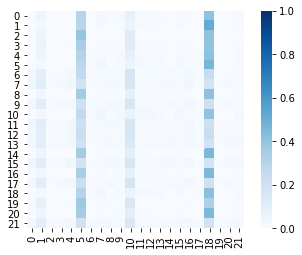

In [8]:
atted_map = sns.heatmap(a, cmap='Blues', vmin=0, vmax=1, cbar=True, square=True, xticklabels=True, yticklabels=True) # Blues, Reds

# 柱状图

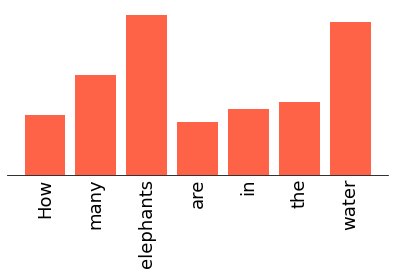

In [129]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
x_labels = ['How', 'many', 'elephants', 'are', 'in', 'the', 'water']
data_values = [0.09, 0.15, 0.24, 0.08, 0.10, 0.11, 0.23]
#bars = plt.bar(x_labels, data_values, color='#FF6347')
# Create a bar plot
plt.bar(x_labels, data_values, color='#FF6347')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks(fontsize=18, rotation=90) 
# Remove x and y ticks
plt.tight_layout()
plt.tick_params(axis='both', which='both', length=0)
# Show the plot
#for bar in bars:
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
    
plt.yticks([])
#plt.show()
plt.savefig('RICB/bar7.jpg', format='jpg', dpi=300, pad_inches = 0)
#plt.bar(x, y, width，color, edgecolor, bottom, linewidth, align, tick_label, align)

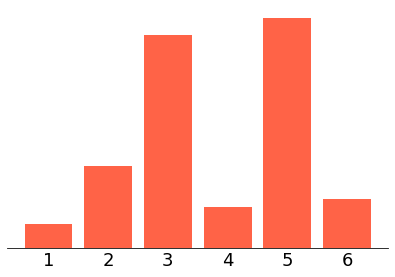

In [132]:
plt.figure(figsize=(6, 4))
x_labels = ['1', '2', '3', '4', '5', '6']
data_values = [0.03, 0.10, 0.26, 0.05, 0.28, 0.06]
#bars = plt.bar(x_labels, data_values, color='#FF6347')
# Create a bar plot
plt.bar(x_labels, data_values, color='#FF6347')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks(fontsize=18) 
# Remove x and y ticks
plt.tight_layout()
plt.tick_params(axis='both', which='both', length=0)
# Show the plot
#for bar in bars:
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
    
plt.yticks([])
#plt.show()
plt.savefig('RICB/bar8.jpg', format='jpg', dpi=300, pad_inches = 0)
#plt.bar(x, y, width，color, edgecolor, bottom, linewidth, align, tick_label, align)